In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data, do some massaging
df=pd.read_csv('bbb_r1.tsv',sep='\t')
df.columns=df.iloc[0]
df=df.shift(-1)[0:9]
df.index=df.Rank
df=df.drop(['Amanda','Pete','Zach','Author','Title','Total','Rank'],axis=1)
df=df.fillna(0)
df=df.astype(int)

In [3]:
# Determine two quantities: the total number of points allocated
# toward the winning book (out of max possible) and the percentage
# of "wasted" votes and store the results
r1Select=df.loc['1'].apply(lambda x: x/10)
for bud in df.columns:
    df[bud]=df[bud].apply(lambda x: x/df[bud].sum())
r1Wasted=df.drop('1').sum()

In [4]:
# Read the data and store results for each round
df=pd.read_csv('bbb_r2.txt',sep=' ')
r2Select=df.loc['MC'].apply(lambda x: x/8)
for bud in df.columns:
    df[bud]=df[bud].apply(lambda x: x/df[bud].sum())
r2Wasted=df.drop('MC').sum()

In [5]:
df=pd.read_csv('bbb_r3.txt',sep=' ')
r3Select=df.loc['HC'].apply(lambda x: x/8)
for bud in df.columns:
    df[bud]=df[bud].apply(lambda x: x/df[bud].sum())
r3Wasted=df.drop('HC').sum()

In [6]:
df=pd.read_csv('bbb_r4.txt',sep=' ')
r4Select=df.loc['SO'].apply(lambda x: x/8)
for bud in df.columns:
    df[bud] = df[bud].apply(lambda x: x/df[bud].sum())
r4Wasted=df.drop('SO').sum()

In [7]:
dfWasted=pd.DataFrame([r1Wasted,r2Wasted,r3Wasted,r4Wasted])
dfSelect=pd.DataFrame([r1Select,r2Select,r3Select,r4Select])

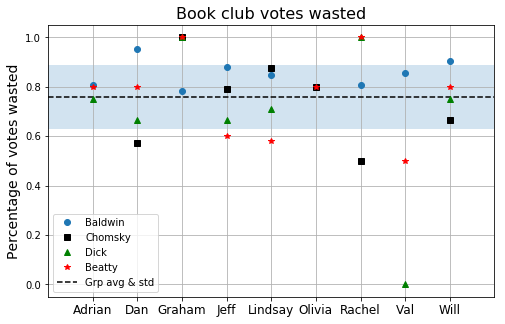

In [8]:
fig=plt.figure(figsize=(8,5))
ax=fig.gca()
dfWasted.transpose().plot(style=['o','ks','g^','r*'],ax=ax)
ax.set_title("Book club votes wasted",fontsize=16)
ax.set_ylabel("Percentage of votes wasted",fontsize=14)
ax.set_xlim(-1,9)
ax.set_xticks(np.arange(0,9))
ax.set_xticklabels(dfWasted.columns,fontsize=12)
ax.hlines(dfWasted.mean().mean(),-1,9,colors='k',linestyle='--')
ax.fill_between(np.linspace(-1,9,2),dfWasted.mean().mean()-dfWasted.mean().std(),dfWasted.mean().mean()+dfWasted.mean().std(),alpha=0.2)
ax.legend(['Baldwin','Chomsky','Dick','Beatty','Grp avg & std'],frameon=True,facecolor='w',loc=3)
ax.grid(True)
plt.savefig("/Users/jeff/Desktop/WastedVotes.png",dpi=4*fig.dpi)
plt.show()

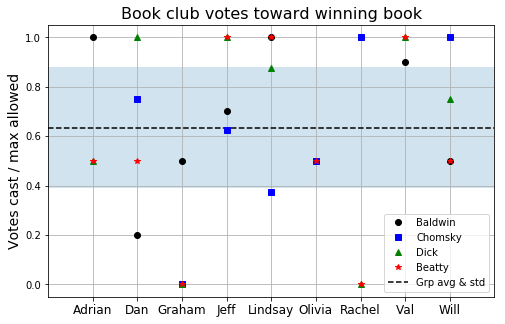

In [9]:
fig=plt.figure(figsize=(8,5))
ax=fig.gca()
dfSelect.transpose().plot(style=['ko','bs','g^','r*'],ax=ax)
ax.set_title("Book club votes toward winning book",fontsize=16)
ax.set_ylabel("Votes cast / max allowed",fontsize=14)
ax.set_xlim(-1,9)
ax.set_xticks(np.arange(0,9))
ax.set_xticklabels(dfWasted.columns,fontsize=12)
ax.grid(True)
ax.hlines(dfSelect.mean().mean(),-1,9,colors='k',linestyle='--')
ax.fill_between(np.linspace(-1,9,2),dfSelect.mean().mean()-dfSelect.mean().std(),dfSelect.mean().mean()+dfSelect.mean().std(),alpha=0.2)
ax.legend(['Baldwin','Chomsky','Dick','Beatty','Grp avg & std'],frameon=True,facecolor='w',loc=4)
plt.savefig("/Users/jeff/Desktop/WinningVotes.png",dpi=4*fig.dpi)
plt.show()